In [1]:
# 了解資料內容
import pandas as pd

train_url = 'https://storage.googleapis.com/py_ml_datasets/train.csv'
train = pd.read_csv(train_url)
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print(train.shape, train.dtypes, train.isnull().sum(), sep='\n\n')

(891, 12)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
# 性別和存活率的關係
print(train.Survived[train.Sex == 'male'].value_counts(normalize = True, sort = False))
print()
print(train.Survived[train.Sex == 'female'].value_counts(normalize = True, sort = False))

0    0.811092
1    0.188908
Name: Survived, dtype: float64

0    0.257962
1    0.742038
Name: Survived, dtype: float64


In [4]:
# 定義一的直方圖的function
import numpy as np
import matplotlib.pyplot as plt

def bar_plotting(lst_1, lst_2, group_1, group_2):
    N = len(lst_1)
    ind = np.arange(N)
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, lst_1, width, color='orange')
    rects2 = ax.bar(ind + width, lst_2, width, color='dodgerblue')
    ax.set_xticklabels((0, 1))
    ax.set_xlabel('Survived')
    ax.set_ylabel('Survived Percentage')
    ax.legend((rects1[0], rects2[0]), (group_1, group_2))

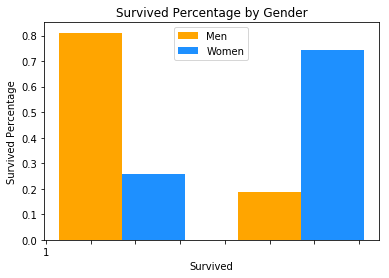

In [5]:
# 性別/存活率的資料視覺化-直方圖
male_survived = list(train.Survived[train.Sex == 'male'].value_counts(normalize = True, sort = False))
female_survived = list(train.Survived[train.Sex == 'female'].value_counts(normalize = True, sort = False))

bar_plotting(male_survived, female_survived, 'Men', 'Women')
plt.title('Survived Percentage by Gender')
plt.show()

In [6]:
# 也許存活率和年齡也有關係，老弱婦孺會先上救生艇
child = pd.Series(np.empty(train.shape[0]))
train.Child = child
age_filter_under_18 = train.Age < 18
age_filter_above_18 = train.Age >= 18
train.Child[age_filter_under_18] = 1
train.Child[age_filter_above_18] = 0
print(train.Survived[train.Child == 1].value_counts(normalize = True, sort = False))
print(train.Survived[train.Child == 0].value_counts(normalize = True, sort = False))

0    0.460177
1    0.539823
Name: Survived, dtype: float64
0    0.618968
1    0.381032
Name: Survived, dtype: float64


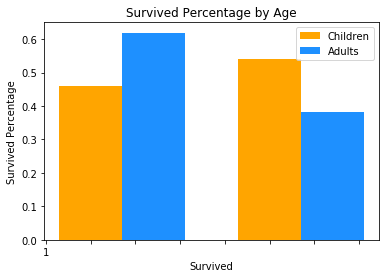

In [7]:
# 成人兒童/存活率的資料視覺化-直方圖
# 目前可推論：乘客是男性、成人：預測死亡；乘客是女性、小孩：預測存活
child_survived = list(train.Survived[train.Child == 1].value_counts(normalize = True, sort = False))
adult_survived = list(train.Survived[train.Child == 0].value_counts(normalize = True, sort = False))

bar_plotting(child_survived, adult_survived, 'Children', 'Adults')
plt.title('Survived Percentage by Age')
plt.show()

In [8]:
# Embarked 的遺漏值都以眾數(S)填補
train_url = 'https://storage.googleapis.com/py_ml_datasets/train.csv'
train = pd.read_csv(train_url)
print(train.Embarked.value_counts())
most_embarked = train.Embarked.value_counts().index[0]
train.Embarked = train.Embarked.fillna(most_embarked)
print(sum(train.Embarked.isnull()))

S    644
C    168
Q     77
Name: Embarked, dtype: int64
0


In [9]:
# Age 的遺漏值以中位數填補
age_median = train.Age.median()
train.Age = train.Age.fillna(age_median)
print(sum(train.Age.isnull()))

0


In [10]:
# 使用 one-hot encoding 進行類別標籤編碼轉換
train_sex_embarked_dummies = pd.get_dummies(train.loc[:, ['Sex', 'Embarked']])
train_sex_embarked_ohe = train_sex_embarked_dummies.values.astype(float)
train_sex_embarked_dummies.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [18]:
# 使用決策樹分類器分類
from sklearn import tree

# 整理 features 跟 target
train_features = np.hstack((train.loc[:, ["Pclass", "Age", "SibSp", "Parch", "Fare"]].values, train_sex_embarked_ohe))
target = train.Survived.values

# 建立模型
from sklearn import tree

# 建立模型
# 設定決策樹的參數
tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 87, max_depth = 10, min_samples_split = 5)
tree_clf.fit(train_features, target)

# 預測、模型評估
print(tree_clf.feature_importances_)
print(tree_clf.score(train_features, target))

[ 0.10910399  0.2445726   0.03457024  0.01866889  0.24796677  0.3247322   0.
  0.01433122  0.          0.0060541 ]
0.904601571268


In [12]:
# 應用預測資料
test_url = 'https://storage.googleapis.com/py_ml_datasets/test.csv'
test = pd.read_csv(test_url)
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
print(test.shape, test.dtypes, test.isnull().sum(), sep='\n\n')

(418, 11)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [14]:
# Age 的遺漏值以中位數填補
age_median = test.Age.median()
test.Age = test.Age.fillna(age_median)
print(sum(test.Age.isnull()))

# Fare 的遺漏值以平均數填補
fare_median = test.Fare.median()
test.Fare = test.Fare.fillna(fare_median)
print(sum(test.Fare.isnull()))

0
0


In [15]:
# 使用 one-hot encoding 進行類別標籤編碼轉換
test_sex_embarked_dummies = pd.get_dummies(test.loc[:, ["Sex", "Embarked"]])
test_sex_embarked_ohe = test_sex_embarked_dummies.values.astype(float)
test_sex_embarked_dummies.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,1,0
1,1,0,0,0,1
2,0,1,0,1,0
3,0,1,0,0,1
4,1,0,0,0,1


In [16]:
# 整理 test_features
test_features = np.hstack((test.loc[:, ["Pclass", "Age", "SibSp", "Parch", "Fare"]].values, test_sex_embarked_ohe))

# 預估
predictions = tree_clf.predict(test_features)
print(predictions)

[0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [17]:
# 結果匯出成CSV
# 
PassengerId =np.array(test['PassengerId']).astype(int)
my_solution = pd.DataFrame(predictions, PassengerId, columns = ['Survived'])
print(my_solution.head())
print(my_solution.shape)
my_solution.to_csv("my_second_solution.csv", index_label = ["PassengerId"])

     Survived
892         0
893         0
894         0
895         0
896         1
(418, 1)
